Brave search: simple gradient tape model<br>
https://www.linkedin.com/pulse/gradient-tape-deploy-descent-tensorflow-vu-hong-quan<br>
https://github.com/quanvu0996/data_science/blob/main/tf/gradient_tape1_en.ipynb<br>

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

Generate dataset: 10 points near y=x

In [11]:
x = np.arange(10)
print(x)

# y=x+np.random.randint(10)
# print(y)

rng=np.random.default_rng(10)
y=x+3*rng.random(10)-1.5
print(y)

m_fit,b_fit = np.polyfit(x, y, 1)

# m,b=1,0
print("polyfit results:")
print("m=",m_fit,"b=",b_fit)

[0 1 2 3 4 5 6 7 8 9]
[ 1.36800513  0.12304543  2.98533466  1.94784637  4.03841385  3.90775881
  6.56710944  8.02524317  7.77652699 10.37077801]
polyfit results:
m= 1.051672749246733 b= -0.02152118556824941


In [12]:
def make_plot(number, X, Y, a, b):
    plt.scatter(X, Y, color='purple')
    plt.plot(X, a*X+b, color='steelblue', linestyle='--', linewidth=2)

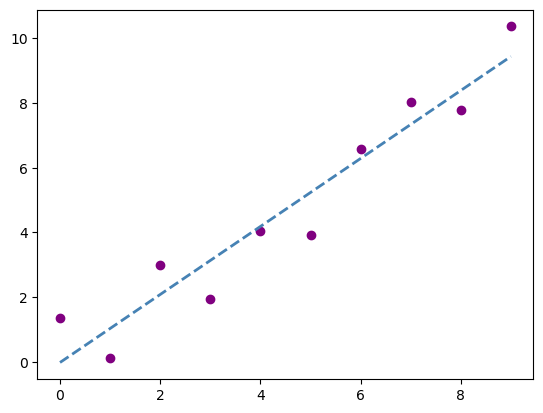

In [13]:
make_plot(0,x,y,m_fit,b_fit)

In [14]:
# Define the loss function
def compute_loss(y_true, m,b):
    y_pred=m*x+b
    # print(y_pred)
    loss = tf.reduce_sum(tf.square(y_true - y_pred))
    return loss

In [15]:
print("Loss=",compute_loss(x,1,0).numpy())    
print("Loss=",compute_loss(x,m_fit,b_fit).numpy())    

Loss= 0
Loss= 0.6655171291941702


optimization with only one variable (slope m)

In [16]:

m = tf.Variable(initial_value=0.0, trainable=True)

optimizer= tf.optimizers.Adam(learning_rate = .07)

iterations = 70

for i in range(1, iterations + 1):
    with tf.GradientTape() as tape:
        loss = compute_loss(y,m,0)
    grads = tape.gradient(loss, m)
    optimizer.apply_gradients([(grads, m)])
    print("Iteration %d: loss=%.2f" % (i, loss))
    print("m=",m.numpy())

Iteration 1: loss=321.73
m= 0.06999953
Iteration 2: loss=281.30
m= 0.13983113
Iteration 3: loss=243.75
m= 0.20936519
Iteration 4: loss=209.12
m= 0.2784552
Iteration 5: loss=177.45
m= 0.34693956
Iteration 6: loss=148.73
m= 0.414639
Iteration 7: loss=122.98
m= 0.48135543
Iteration 8: loss=100.15
m= 0.5468731
Iteration 9: loss=80.20
m= 0.6109578
Iteration 10: loss=63.06
m= 0.6733585
Iteration 11: loss=48.61
m= 0.73380876
Iteration 12: loss=36.73
m= 0.7920303
Iteration 13: loss=27.26
m= 0.84773725
Iteration 14: loss=20.01
m= 0.9006419
Iteration 15: loss=14.76
m= 0.95046175
Iteration 16: loss=11.28
m= 0.9969274
Iteration 17: loss=9.30
m= 1.0397915
Iteration 18: loss=8.57
m= 1.0788374
Iteration 19: loss=8.82
m= 1.1138877
Iteration 20: loss=9.78
m= 1.144811
Iteration 21: loss=11.21
m= 1.1715281
Iteration 22: loss=12.88
m= 1.1940141
Iteration 23: loss=14.60
m= 1.2122998
Iteration 24: loss=16.22
m= 1.2264707
Iteration 25: loss=17.60
m= 1.2366631
Iteration 26: loss=18.67
m= 1.2430592
Iteration 2

optimization with both variables (slope m and offset b) in an array

In [17]:
# Define the loss function
def compute_loss_mb(y_true, mb):
    # print(mb[0],mb[1])
    y_pred=mb[0]*x+mb[1]
    # print(y_pred)
    loss = tf.reduce_sum(tf.square(y_true - y_pred))
    return loss

In [18]:

mb = tf.Variable([0.1, 0.2])

# optimizer= tf.optimizers.Adam(learning_rate = .07)
optimizer= tf.optimizers.Adam(learning_rate = .27)

iterations = 200

for i in range(1, iterations + 1):
    with tf.GradientTape() as tape:
        # loss = compute_loss(y,m,b_fit)
        loss = compute_loss_mb(y,mb)
    grads = tape.gradient(loss, mb)
    optimizer.apply_gradients([(grads, mb)])

    print("Iteration %d: loss=%.2f" % (i, loss))
    print("m=",mb[0].numpy(),"b=",mb[1].numpy())

# printm= 1.051672749246733 b= -0.02152118556824941
print("polyfit results:")
print("m=",m_fit,"b=",b_fit)

Iteration 1: loss=248.19
m= 0.36999822 b= 0.46999824
Iteration 2: loss=113.24
m= 0.63162947 b= 0.7304059
Iteration 3: loss=36.06
m= 0.8723358 b= 0.9660407
Iteration 4: loss=11.53
m= 1.0726942 b= 1.1531923
Iteration 5: loss=24.70
m= 1.2129884 b= 1.2697165
Iteration 6: loss=51.39
m= 1.2857649 b= 1.311194
Iteration 7: loss=70.01
m= 1.2982931 b= 1.2897896
Iteration 8: loss=72.18
m= 1.2642676 b= 1.2220044
Iteration 9: loss=60.69
m= 1.1974765 b= 1.122396
Iteration 10: loss=42.70
m= 1.1101651 b= 1.0029944
Iteration 11: loss=25.41
m= 1.0133868 b= 0.8742913
Iteration 12: loss=13.90
m= 0.91752404 b= 0.7460642
Iteration 13: loss=10.30
m= 0.83224577 b= 0.6275265
Iteration 14: loss=13.67
m= 0.7657355 b= 0.52670527
Iteration 15: loss=20.75
m= 0.7235678 b= 0.44936615
Iteration 16: loss=27.54
m= 0.70798564 b= 0.39817733
Iteration 17: loss=30.99
m= 0.7180314 b= 0.37263173
Iteration 18: loss=29.99
m= 0.7503029 b= 0.36964357
Iteration 19: loss=25.35
m= 0.79981494 b= 0.3843655
Iteration 20: loss=19.07
m= 